In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, rms)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [7]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [8]:
meta_div <- meta_div[ meta_div$cancergroup != "Normal", ]

In [9]:
meta_div$log10shann <- log10(meta_div$observed_Shannon)

In [10]:
pbmc <- meta_div[ which(meta_div$sampletype == "PBMC"),]
cfdna <- meta_div[ which(meta_div$sampletype == "cfDNA"),]

In [11]:
pbmc_noLFS <- pbmc[ which(pbmc$cancergroup != "LFS"),]

In [12]:
dim(pbmc_noLFS)

[1] 234  59

In [13]:
hlas <- readr::read_rds(paste0(datapath, "/HLA/INT_HLA_PCA_postqc.rds"))

In [21]:
vgene <- readr::read_rds(paste0(datapath, "/capTCRseq/INT_PBMC_V_PCA_postqc.rds"))

In [15]:
hlas$Patient <- rownames(hlas)
hlas$Patient <- paste("CHP_", "", hlas$Patient, sep = "")
hlas$Patient <- gsub("-.*", "", hlas$Patient)

In [16]:
dim(hlas)

[1] 67 68

In [17]:
head(hlas)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,Patient
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
315-05,1.15890201,-2.898493,-3.4723486,3.3513972,-1.2856095,1.3652377,-0.98814450,0.3025367,-2.4434325,0.7885129,...,0.04809325,0.31848056,0.3792461,0.48432470,-0.31782748,-0.15632117,0.11953686,0.0143342286,-2.666270e-15,CHP_315
319-05,-4.56374676,-1.367813,2.0296584,-0.8423059,-0.7075454,-2.2932518,1.85458779,0.7702846,-0.5651254,1.6015236,...,0.80729791,0.29301440,0.1399793,0.22943811,-0.69063112,0.19551515,-0.08730404,-0.0411502225,1.908196e-17,CHP_319
323-03,4.29021503,-1.655735,-1.5965245,0.1538018,1.9207118,-1.5288560,3.20844423,-3.1797025,3.5822593,-1.8978836,...,-0.04265836,-0.04030207,-0.1558266,-0.07187716,-0.08719310,-0.01660297,-0.05961457,0.0770658974,1.462372e-15,CHP_323
329-04,-4.25557065,0.314588,-4.4081750,-1.0062229,4.8715689,-0.2699918,-1.20600856,-0.9781981,1.8880483,0.7504148,...,0.10208720,-0.38351856,0.1420335,0.07055897,0.30820487,0.01584124,0.03888392,-0.1613784630,-3.278627e-16,CHP_329
330-05,-0.08941476,-2.768304,2.1200714,-3.4903109,-1.0884092,-1.3053444,-0.04510793,-2.1610084,-0.1333316,1.4136399,...,-0.07073121,0.16185579,0.3380909,0.34679493,0.13256591,-0.01518200,-0.02311564,-0.1974133531,1.115427e-15,CHP_330
331-04,3.44426309,4.036729,0.8425664,-0.1457962,1.5503795,0.8197901,1.79551677,0.8606525,-2.9234943,0.1003881,...,0.60078922,0.78459363,-0.1427119,0.11234774,0.04738167,-0.21322384,-0.04261676,-0.0001452749,4.631712e-16,CHP_331


In [18]:
pbmc_noLFS$HLA_PC1 <- hlas[ match(pbmc_noLFS$Patient, hlas$Patient), "PC1"]
pbmc_noLFS$HLA_PC2 <- hlas[ match(pbmc_noLFS$Patient, hlas$Patient), "PC2"]
pbmc_noLFS$HLA_PC3 <- hlas[ match(pbmc_noLFS$Patient, hlas$Patient), "PC3"]

In [23]:
head(vgene)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP-328-04-PBMC-DNA,-4.321728,-0.03212677,-0.8674132,-0.5720319,2.0116468,0.2539799,-0.9105453,0.27941627,-0.4430697,-0.7240545,...,-0.03846443,0.006610509,-0.27729290,0.17840026,-0.21411618,-0.43036180,-0.009790303,-0.24412197,0.31029834,0.03493672
CHP-328-05-PBMC-DNA,1.813318,-0.47595082,-0.6983832,-0.4500168,0.7059845,0.7060431,-0.4387870,0.39149765,0.2029042,0.4762534,...,-0.13661626,0.068570605,0.22334894,0.28242786,-0.11267415,0.21252573,0.136022733,0.20535303,0.08131802,-0.10495953
CHP-351-03-PBMC-DNA,-16.703431,3.16852193,0.9447233,0.6495886,-1.1581014,-1.0061298,-4.0954143,5.25260421,-1.2200082,-2.4059916,...,0.32221663,-0.431435864,-0.04502638,-0.37241404,-0.17000484,0.03092922,-0.054612680,-0.08443263,-0.15691430,0.09631231
CHP-353-04-PBMC-DNA,-28.969007,-3.91092179,-8.4594291,-2.1278024,-3.3761498,1.5486870,0.4049921,-1.93592234,3.8118639,-1.4423686,...,-0.19248382,0.014672908,-0.51183721,-0.04616347,-0.19675278,0.04284492,-0.011685493,0.11843199,0.05597463,0.16759331
CHP-363-04-PBMC-DNA,-9.663401,3.15165741,1.4763998,1.0217333,1.1992817,2.2791147,-0.8674050,-0.12794262,0.7092086,-0.9763820,...,0.38661497,0.164384541,-0.25098190,0.34827781,-0.04840122,0.22162394,0.078737809,0.42797468,0.15594229,-0.04549570
CHP-369-01-PBMC-DNA,-8.448113,-2.29942878,0.2950300,-2.5663195,0.5472186,-0.2208723,0.4169612,0.02371057,-1.2230712,-1.8582157,...,-0.56185823,0.132931233,0.36414564,0.38310917,-0.53532623,-0.12928019,-0.135370535,0.14120180,-0.36708205,0.20002964


In [22]:
pbmc_noLFS$V_PC1 <- vgene[ match(pbmc_noLFS$basename, rownames(vgene)), "PC1"]
pbmc_noLFS$V_PC2 <- vgene[ match(pbmc_noLFS$basename, rownames(vgene)), "PC2"]
pbmc_noLFS$V_PC3 <- vgene[ match(pbmc_noLFS$basename, rownames(vgene)), "PC3"]

In [24]:
pbmc_noLFS$is_solid <- NA
pbmc_noLFS$is_solid[ which(pbmc_noLFS$cancergroup == "Solid")] <- 1
pbmc_noLFS$is_solid[ which(pbmc_noLFS$cancergroup != "Solid")] <- 0

In [25]:
pbmc_noLFS$is_leu <- NA
pbmc_noLFS$is_leu[ which(pbmc_noLFS$cancergroup == "Leukemia")] <- 1
pbmc_noLFS$is_leu[ which(pbmc_noLFS$cancergroup != "Leukemia")] <- 0

In [26]:
pbmc_noLFS$is_lym <- NA
pbmc_noLFS$is_lym[ which(pbmc_noLFS$cancergroup == "Lymphoma")] <- 1
pbmc_noLFS$is_lym[ which(pbmc_noLFS$cancergroup != "Lymphoma")] <- 0

In [27]:
table(pbmc_noLFS$cancergroup )


Leukemia Lymphoma    Solid 
     120       42       72 

In [48]:
dd <- datadist(pbmc_noLFS[ , c("HLA_PC1", "HLA_PC2", "HLA_PC3", 
 "log10shann",  "is_solid", "is_leu", "is_lym")])
options(datadist="dd")

In [43]:
# ggplot(pbmc_noLFS) + geom_point(aes(x = HLA_PC1, y = HLA_PC2, color = cancergroup))

In [44]:
f <- ols(log10shann ~ cycle + cancergroup + Age + HLA_PC1 + HLA_PC2 + HLA_PC3, data = pbmc_noLFS)

In [49]:
anova(f)

,d.f.,Partial SS,MS,F,P
cycle,4,2.72335975,0.68083994,2.60012088,0.0378954051
cancergroup,2,2.21063963,1.10531981,4.22120526,0.0162394698
Age,1,0.49533932,0.49533932,1.89169589,0.1708098641
HLA_PC1,1,2.14662878,2.14662878,8.19795372,0.0047186854
HLA_PC2,1,0.33282521,0.33282521,1.27105612,0.2611481154
HLA_PC3,1,0.01671666,0.01671666,0.06384076,0.8008287863
TOTAL,10,9.08803506,0.90880351,3.47071145,0.0003537523
ERROR,171,44.77623726,0.26184934,NA,NA


In [50]:
myfit <- lrm(is_lym ~ HLA_PC1 + HLA_PC2 + HLA_PC3, data = pbmc_noLFS)

In [51]:
summary(pbmc_noLFS$HLA_PC1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-6.0040 -1.8375  0.4423  0.2191  2.1576  6.4402      52 

In [52]:
dim(pbmc_noLFS)

[1] 234  68

In [55]:
anova(myfit)

,Chi-Square,d.f.,P
HLA_PC1,8.3294756,1,0.003900692
HLA_PC2,3.8484585,1,0.049791733
HLA_PC3,0.5684973,1,0.450856676
TOTAL,8.5004131,3,0.036726262


In [54]:
summary(myfit )

,Low,High,Diff.,Effect,S.E.,Lower 0.95,Upper 0.95,Type
HLA_PC1,-1.837542,2.157602,3.995144,-1.2269377,0.4251221,-2.0601617582,-0.3937137,1
Odds Ratio,-1.837542,2.157602,3.995144,0.2931890,NA,0.1274333548,0.6745471,2
HLA_PC2,-1.655735,2.049877,3.705612,0.8906341,0.4540001,0.0008103226,1.7804579,1
Odds Ratio,-1.655735,2.049877,3.705612,2.4366743,NA,1.0008106510,5.9325726,2
HLA_PC3,-1.583885,2.160519,3.744405,0.2841800,0.3769028,-0.4545358899,1.0228960,1
Odds Ratio,-1.583885,2.160519,3.744405,1.3286721,NA,0.6347424900,2.7812375,2


In [33]:
myfit <- lrm(is_leu ~ HLA_PC1 + HLA_PC2 + HLA_PC3 + log10shann + cycle, 
data = pbmc_noLFS)

In [34]:
myfit

Frequencies of Missing Values Due to Each Variable
    is_leu    HLA_PC1    HLA_PC2    HLA_PC3 log10shann      cycle 
         0         52         52         52          0          0 

Logistic Regression Model

lrm(formula = is_leu ~ HLA_PC1 + HLA_PC2 + HLA_PC3 + log10shann + 
    cycle, data = pbmc_noLFS)


                      Model Likelihood      Discrimination    Rank Discrim.    
                            Ratio Test             Indexes          Indexes    
Obs           182    LR chi2     14.66      R2       0.103    C       0.655    
 0             95    d.f.            8      R2(8,182)0.036    Dxy     0.311    
 1             87    Pr(> chi2) 0.0661    R2(8,136.2)0.048    gamma   0.311    
max |deriv| 9e-12                           Brier    0.231    tau-a   0.156    

           Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  -1.6980 0.6728 -2.52  0.0116  
HLA_PC1     0.0072 0.0556  0.13  0.8967  
HLA_PC2    -0.0481 0.0541 -0.89  0.3740  
HLA_PC3    -0.0816 0.0621 -1.31  0.1885

In [48]:
myfit <- lrm(is_solid ~ HLA_PC1 + HLA_PC2 + HLA_PC3 , 
data = pbmc_noLFS)

In [49]:
myfit

Frequencies of Missing Values Due to Each Variable
is_solid  HLA_PC1  HLA_PC2  HLA_PC3 
       0       52       52       52 

Logistic Regression Model

lrm(formula = is_solid ~ HLA_PC1 + HLA_PC2 + HLA_PC3, data = pbmc_noLFS)


                      Model Likelihood      Discrimination    Rank Discrim.    
                            Ratio Test             Indexes          Indexes    
Obs           182    LR chi2      7.32      R2       0.054    C       0.596    
 0            113    d.f.            3      R2(3,182)0.023    Dxy     0.191    
 1             69    Pr(> chi2) 0.0624    R2(3,128.5)0.033    gamma   0.191    
max |deriv| 4e-14                           Brier    0.227    tau-a   0.091    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept -0.5523 0.1591 -3.47  0.0005  
HLA_PC1    0.1417 0.0575  2.47  0.0137  
HLA_PC2    0.0214 0.0529  0.40  0.6855  
HLA_PC3    0.0707 0.0630  1.12  0.2622  


In [35]:
colnames(pbmc_noLFS)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "log10shann"         "HLA_PC1"           
[61] "HLA_PC2"            "HLA_PC3"            "is_solid"          
[64] "is_leu"             "is_lym"

In [67]:
HLA="HLA_DRB1"; length="13"; pos="6"

library(data.table)
library(MVLM)

In [68]:
pdata <- read.table(paste0("~/git/cdr3-QTL/data/tcr_phenotype/L", length, "_P", pos, "_rm_gl/single_aa_usage_ratio.txt.gz"),
    header = T, stringsAsFactors = F,
)
pdata <- as.data.frame(pdata)


In [69]:


 #for( HLA in c("HLA_A","HLA_B","HLA_C","HLA_DPA1","HLA_DPB1","HLA_DQA1","HLA_DQB1","HLA_DRB1") ) {

 #output file and directory
 #ofile <- paste0("assoc/HIP/manova/v2_newgeno_length_cov_newscript_rm_gl/", HLA, ".", length, ".", pos,".manova.v2_newgeno.txt.gz")

 #phenotype

pass <- pnamelist <- read.table(paste0("~/git/cdr3-QTL/data/tcr_phenotype/L",length,"_P",pos,"_rm_gl/single_aa_usage_ratio.pass"),
   stringsAsFactors=F)[,1]
pdata <- pdata[is.element(pdata$AA, pass), ]
pdata <- subset(pdata, AA!="unresolved")

pnamelist <- unique(pdata$AA)

In [70]:
pall <- data.frame()
for( ptarget in pnamelist ){
    pdata2 <- subset(pdata, AA==ptarget)
    pdata2 <- pdata2[,c("Sample", "rate")]
    x <- pdata2$rate
    pdata2$normrate <- qnorm( (rank(x, na.last="keep") - 0.5) / sum(!is.na(x)) ) #inverse normal normalization
    #head(M)
    #cancel V gene effect by averaging
    df <- pdata2[,c("Sample","normrate")]
    df$ptarget <- ptarget
    pall <- rbind(pall,df)
}

In [71]:
mat <- matrix(0, nrow=length(unique(pall$Sample)), ncol=length(unique(pall$ptarget)) )
row.names(mat) <- unique(pall$Sample)
colnames(mat) <- unique(pall$ptarget)

for( i in unique(pall$Sample)){
for( k in unique(pall$ptarget)){
   out <- subset(pall, Sample==i & ptarget==k)
   if( nrow(out) ==1 ){
      mat[i,k] <- out$normrate
   }else{
       mat[i,k] <- 0
   }
}
}

In [72]:
mat <- data.frame(Sample=row.names(mat),mat)

 #covariate (only use genotype pca)
cdata <- read.table("~/git/cdr3-QTL/data/genotype/HLA_A_B_C_DQB1_DRB1_4digit.pca", header=T, stringsAsFactors=F)
cdata <- as.data.frame(cdata)
row.names(cdata) <- cdata$id
colnames(cdata)[1] <- "Sample"
cdata <- cdata[,c("Sample", "PC1", "PC2", "PC3")]

In [73]:
 #main calculations
gtargettaglist <- dir("~/git/cdr3-QTL/data/genotype/v2")
gtargettaglist <- grep( paste0("AA_", unlist(strsplit(HLA,"_"))[2] ,"_"), gtargettaglist, value=T)
gtargettaglist <- gsub(".txt", "", gtargettaglist)

In [74]:
gtargettaglist

[1] "AA_DRB1_.1_32557433"  "AA_DRB1_.16_32557478" "AA_DRB1_.17_32557481"
 [4] "AA_DRB1_.24_32557502" "AA_DRB1_.25_32557505" "AA_DRB1_10_32552139" 
 [7] "AA_DRB1_104_32549587" "AA_DRB1_11_32552136"  "AA_DRB1_112_32549563"
[10] "AA_DRB1_12_32552133"  "AA_DRB1_120_32549539" "AA_DRB1_13_32552130" 
[13] "AA_DRB1_133_32549500" "AA_DRB1_14_32552127"  "AA_DRB1_140_32549479"
[16] "AA_DRB1_142_32549473" "AA_DRB1_149_32549452" "AA_DRB1_16_32552121" 
[19] "AA_DRB1_166_32549401" "AA_DRB1_180_32549359" "AA_DRB1_181_32549356"
[22] "AA_DRB1_189_32548632" "AA_DRB1_231_32548031" "AA_DRB1_233_32548025"
[25] "AA_DRB1_25_32552094"  "AA_DRB1_26_32552091"  "AA_DRB1_28_32552085" 
[28] "AA_DRB1_30_32552079"  "AA_DRB1_31_32552076"  "AA_DRB1_32_32552073" 
[31] "AA_DRB1_33_32552070"  "AA_DRB1_37_32552058"  "AA_DRB1_38_32552055" 
[34] "AA_DRB1_4_32557421"   "AA_DRB1_40_32552049"  "AA_DRB1_47_32552028" 
[37] "AA_DRB1_57_32551998"  "AA_DRB1_58_32551995"  "AA_DRB1_60_32551989" 
[40] "AA_DRB1_67_32551968"  "AA_DRB1_70_32551959"  "AA_DRB1_71_32551956" 
[43] "AA_DRB1_73_32551950"  "AA_DRB1_74_32551947"  "AA_DRB1_77_32551938" 
[46] "AA_DRB1_78_32551935"  "AA_DRB1_85_32551914"  "AA_DRB1_86_32551911" 
[49] "AA_DRB1_9_32552142"   "AA_DRB1_96_32549611"  "AA_DRB1_98_32549605"

In [75]:
res <- data.frame()
for( gtargettag in gtargettaglist ){
    # gtargettag="AA_DRB1_13_32552130"
   
   gdata2 <- read.table(paste0("~/git/cdr3-QTL/data/genotype/v2/",gtargettag,".txt"), header=T, stringsAsFactors=F)
      # ref allele has already removed (most common)
   M <- merge(gdata2, mat, by="Sample")
   M <- merge(M, cdata, by="Sample")
   
   #make formula
   x <- paste(pnamelist, collapse=",")
   x <- paste("cbind(",x,") ~")
   y <- paste(colnames(gdata2)[-1], collapse=" + ")
   y <- paste(y,"+ PC1 + PC2 + PC3")
   formula1 <- as.formula(paste(x,y))
   
   x <- paste(pnamelist, collapse=",")
   x <- paste("cbind(",x,") ~")
   y <- paste(" PC1 + PC2 + PC3")
   formula0 <- as.formula(paste(x,y))
   
   #pvalue
   mod1 <- lm( formula1 , data = M)
   mod0 <- lm( formula0, data = M)
   test <- anova(mod0, mod1)
   pvalue_lm <- test$"Pr(>F)"[2]
   
   #STEP2: use MVLM
   #full
   x <- paste(pnamelist, collapse=",")
   x <- paste("cbind(",x,") ~")
   y <- paste(colnames(gdata2)[-1], collapse=" + ")
   y <- paste(y,"+ PC1 + PC2 + PC3")
   formula1 <- as.formula(paste(x,y))
   mvlm.res <- mvlm( formula1 , data = M)
   mvlm.res_full <- mvlm.res
      # summary(mvlm.res)
   pseudo_rsq_full <- mvlm.res$pseudo.rsq["Omnibus Effect",1] 
   
   #null
   x <- paste(pnamelist, collapse=",")
   x <- paste("cbind(",x,") ~")
   y <- paste(" PC1 + PC2 + PC3")
   formula0 <- as.formula(paste(x,y))
   mvlm.res1 <- mvlm( formula0 , data = M)
   mvlm.res <- mvlm.res1
   pseudo_rsq_null <- mvlm.res$pseudo.rsq["Omnibus Effect",1] 
   
   dump <- data.frame(HLA, length, pos, gtargettag, pvalue_lm,  
      pseudo_rsq_full, pseudo_rsq_null)
   
   res <- rbind(res, dump)
}

res <- res[order(res$pvalue_lm),]

In [80]:
head(gdata2)

,Sample,dose1
,<chr>,<int>
1,HIP00110,0
2,HIP00169,0
3,HIP00594,0
4,HIP00602,1
5,HIP00614,0
6,HIP00640,2


In [79]:
M[ M$Sample=="HIP00110", ]

,Sample,dose1,A,C,D,E,F,G,H,I,...,Q,R,S,T,V,W,Y,PC1,PC2,PC3
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HIP00110,0,0.6792223,1.95159,-1.141279,-1.93858,-0.1475388,1.308539,-1.307693,-1.078567,...,-1.155837,1.51162,0.07723269,-0.02446653,1.240705,1.626895,0.2959513,-0.3715639,0.1614687,0.976543


In [55]:
mvlm.res_full$pseudo.rsq

Omnibus Effect,0.056499126
dose1,0.018644352
PC1,0.009310307
PC2,0.010323079
PC3,0.009011130


In [57]:
HLA="HLA_DRB1"; length="13"; pos="6"

 #library(data.table)
 #output file and directory
 #ofile <- paste0("assoc/HIP/lm/length_productive_v1_cov_rm_gl/", HLA, ".L", length,"_P", pos ,".lm.v2.txt.gz")

 #phenotype
pdata <- read.table(paste0("~/git/cdr3-QTL/data/tcr_phenotype/L",length,"_P",pos,"_rm_gl/single_aa_usage_ratio.txt.gz"),
   header=T, stringsAsFactors=F)
pdata <- as.data.frame(pdata)
colnames(pdata)[2] <- "pname"
pdata <- pdata[ ,c("Sample", "pname", "rate")]

 #genotype (NEW GENOTYPE): 1% maf qc
gdata <- read.table(paste0("~/git/cdr3-QTL/data/genotype/", HLA, ".imgt.aa.postqc.matrix"), header=T, stringsAsFactors=F)
gdata <- as.data.frame(gdata)
row.names(gdata) <- gdata$id
colnames(gdata)[1] <- "Sample"

 #covariate (only use genotype pca)
cdata <- read.table("~/git/cdr3-QTL/data/genotype/HLA_A_B_C_DQB1_DRB1_4digit.pca", header=T, stringsAsFactors=F)
row.names(cdata) <- cdata$id
colnames(cdata)[1] <- "Sample"
cdata <- cdata[,c("Sample", "PC1", "PC2", "PC3")]

 #main calculations
pnamelist <- read.table(paste0("~/git/cdr3-QTL/data/tcr_phenotype/L",length,"_P",pos,"_rm_gl/single_aa_usage_ratio.pass"),
   stringsAsFactors=F)[,1]
gnamelist <- colnames(gdata)[ -1 ]

pnamelist <- head(pnamelist,n=2) #to save time in this example script

res <- data.frame()
for( ptarget in pnamelist ){
for( gtarget in gnamelist ){
        # ptarget = "E"; gtarget="AA_DRB1_11_32552136_VL"
   #prep data
   pdata2 <- subset(pdata, pname==ptarget )
   pdata2 <- pdata2[,c("Sample", "rate")]
   gdata2 <- gdata[ ,c("Sample", gtarget)]
   colnames(gdata2) <- c("Sample", "dose")
   M <- merge(gdata2, pdata2, by="Sample")
   M <- merge(M, cdata, by="Sample")
   x <- M$rate
   M$normrate <- qnorm( (rank(x, na.last="keep") - 0.5) / sum(!is.na(x)) ) #inverse normal normalization
   
   if( var(M$dose) > 0 & var(M$rate) ){
      #non-normalized ratio
      test1 <- lm( rate ~  dose + PC1 + PC2 + PC3, data=M)
      beta1 <- summary(test1)$coefficients["dose","Estimate"]
      pvalue1 <- summary(test1)$coefficients["dose","Pr(>|t|)"]
      
      #normalized ratio
      test2 <- lm( normrate ~  dose + PC1 + PC2 + PC3, data=M)
      beta2 <- summary(test2)$coefficients["dose","Estimate"]
      pvalue2 <- summary(test2)$coefficients["dose","Pr(>|t|)"]
      
      dump <- data.frame( pname=ptarget, gname=gtarget, beta1, pvalue1, beta2, pvalue2)
      res <- rbind(res, dump)
      
   } else {
      dump <- data.frame( pname=ptarget, gname=gtarget, beta1=NA, pvalue1=NA, beta2=NA, pvalue2=NA)
      res <- rbind(res, dump)
   }
}
}

res <- res[order(res$pvalue2), ]

In [65]:
pnamelist

[1] "A" "C"

In [64]:
res

,pname,gname,beta1,pvalue1,beta2,pvalue2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
170,A,AA_DRB1_13_32552130_RF,0.001630363,3.306416e-14,0.5056838,3.233439e-14
102,A,AA_DRB1_37_32552058_YS,0.001407987,1.074648e-13,0.4349094,1.339783e-13
33,A,AA_DRB1_96_32549611_QE,0.001641206,2.024633e-13,0.5084806,2.113490e-13
37,A,AA_DRB1_96_32549611_YH,-0.001641206,2.024633e-13,-0.5084806,2.113490e-13
92,A,AA_DRB1_37_32552058_NF,-0.001296695,2.209537e-11,-0.4034099,1.880358e-11
210,A,AA_DRB1_11_32552136_VSG,-0.001427689,1.928578e-11,-0.4412769,2.237961e-11
194,A,AA_DRB1_11_32552136_SG,-0.001230059,4.370326e-11,-0.3800974,5.102212e-11
159,A,AA_DRB1_13_32552130_HRF,0.001230059,4.370326e-11,0.3800974,5.102212e-11
94,A,AA_DRB1_37_32552058_S,0.001435718,9.578504e-11,0.4430845,1.175961e-10


In [285]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc <- ggplot(
  pbmc_noLFS,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 2) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = pbmc_noLFS,
    p.adjust.method = "BH", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # does not allow multiple testing, shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity")

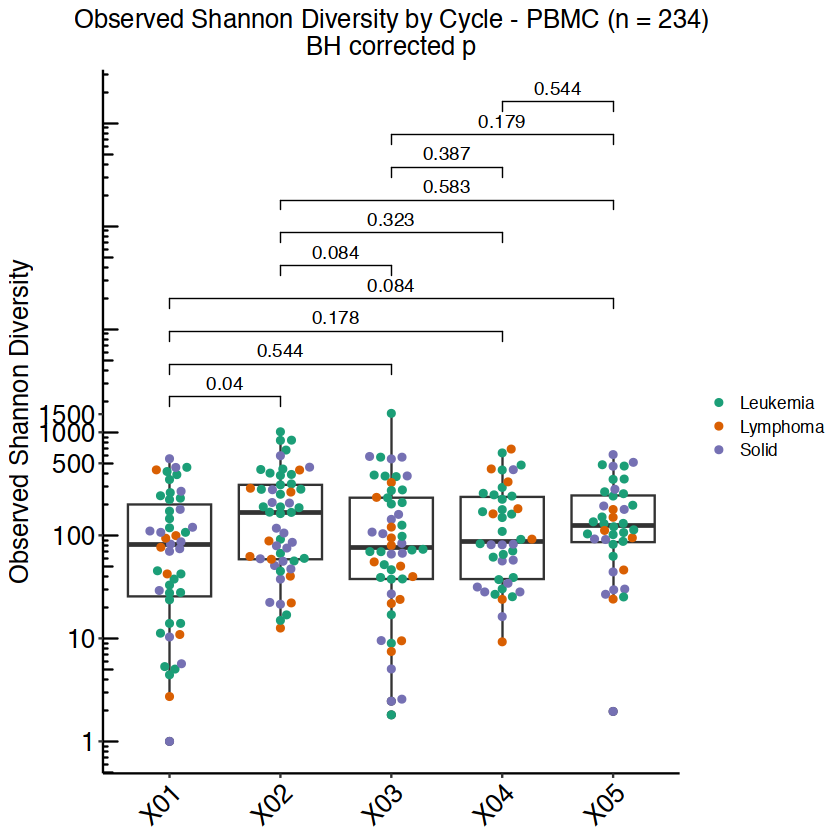

In [286]:
p_pbmc

In [415]:
summary(aov(log10shann ~ cycle, pbmc_noLFS))

             Df Sum Sq Mean Sq F value Pr(>F)  
cycle         4   4.10  1.0249   3.181 0.0144 *
Residuals   229  73.78  0.3222                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [420]:
colnames(pbmc_noLFS)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "Pass"              
[10] "CD3"                "EM"                 "CM"                
[13] "Naïve"              "SCM"                "TE"                
[16] "EM."                "CM."                "Naïve."            
[19] "SCM."               "TE."                "Naïve.TE"          
[22] "N.CM.SCM.TE.EM"     "PD.1"               "PDL1"              
[25] "LAG3"               "TIM3"               "CTLA4"             
[28] "PD1."               "PDL1."              "LAG3."             
[31] "TIM3."              "CTLA4."             "Any.NCR"           
[34] "PD1...LAG3...TIM3"  "cancergroup"        "TRB"               
[37] "Reads"              "CPKR"               "Average_reads"     
[40] "VMR"                "Max_reads"          "Singletons"        
[43] "Doubletons"         "qD"                 "Sample_Coverage"   
[46] "observed_Richness"  "estimated_Richness" "SE_Richeness"      
[49] "observed_Shannon"   "estimated_Shannon"  "SE_Shannon"        
[52] "observed_Simpson"   "estimated_Simpson"  "SE_Simpson"        
[55] "file"               "basename"           "Group"             
[58] "sampletype"         "log10shann"

In [419]:
myfit <- lm(log10shann ~ cycle + Disease_type + Age, pbmc_noLFS)
summary(myfit)


Call:
lm(formula = log10shann ~ cycle + Disease_type, data = pbmc_noLFS)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66559 -0.29446  0.06539  0.35112  1.31509 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.875094   0.286304   6.549 4.33e-10 ***
cycleX02            0.379076   0.112446   3.371  0.00089 ***
cycleX03            0.109340   0.113612   0.962  0.33695    
cycleX04            0.253900   0.120587   2.106  0.03643 *  
cycleX05            0.301428   0.122498   2.461  0.01467 *  
Disease_typeALL    -0.061404   0.289128  -0.212  0.83202    
Disease_typeAML     0.138965   0.299389   0.464  0.64301    
Disease_typeARMS    0.323764   0.482168   0.671  0.50265    
Disease_typeBL     -0.148576   0.329512  -0.451  0.65253    
Disease_typeBLL    -0.149342   0.393387  -0.380  0.70460    
Disease_typeCML    -0.145182   0.348155  -0.417  0.67710    
Disease_typeDLBCL  -0.337612   0.374123  -0.902  0.36787    
Disease_typeER

In [418]:
myfit <- aov(log10shann ~ cycle + Disease_type , pbmc_noLFS)

summary.lm(myfit)


Call:
aov(formula = log10shann ~ cycle + Disease_type, data = pbmc_noLFS)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66559 -0.29446  0.06539  0.35112  1.31509 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.875094   0.286304   6.549 4.33e-10 ***
cycleX02            0.379076   0.112446   3.371  0.00089 ***
cycleX03            0.109340   0.113612   0.962  0.33695    
cycleX04            0.253900   0.120587   2.106  0.03643 *  
cycleX05            0.301428   0.122498   2.461  0.01467 *  
Disease_typeALL    -0.061404   0.289128  -0.212  0.83202    
Disease_typeAML     0.138965   0.299389   0.464  0.64301    
Disease_typeARMS    0.323764   0.482168   0.671  0.50265    
Disease_typeBL     -0.148576   0.329512  -0.451  0.65253    
Disease_typeBLL    -0.149342   0.393387  -0.380  0.70460    
Disease_typeCML    -0.145182   0.348155  -0.417  0.67710    
Disease_typeDLBCL  -0.337612   0.374123  -0.902  0.36787    
Disease_typeE

In [273]:
dim(cfdna)

[1] 270  59

In [332]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_cfnda <- ggplot(
  cfdna,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_beeswarm(aes(color = cancergroup), cex = 1) +
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  #scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = cfdna,
    p.adjust.method = "BH", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1
  ) + # does not allow multiple testing, shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - cfDNA (n = 270)\nBH corrected p", y = "Observed Shannon Diversity")

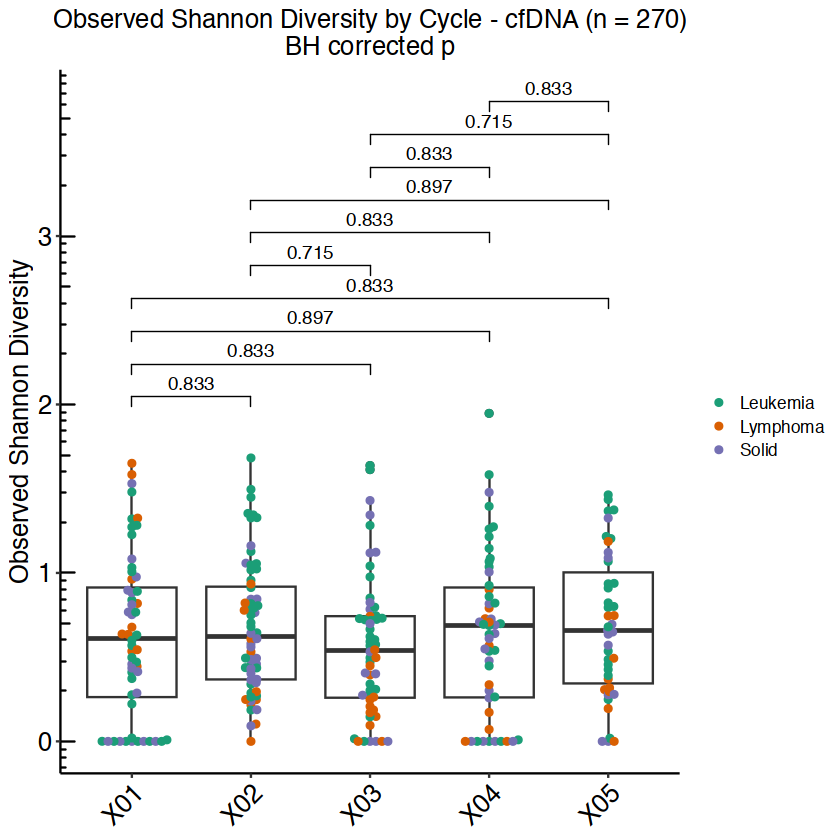

In [333]:
p_cfnda

In [402]:
mytab <- table(pbmc_noLFS$Patient, pbmc_noLFS$cycle) 

In [403]:
#select Patient with cycle 1 and 2
mytab <- mytab[mytab[,1] > 0 & mytab[,2] > 0,]

In [404]:
tmp <- pbmc_noLFS[which(pbmc_noLFS$Patient %in% rownames(mytab)),]
paired_pbmc <- tmp[ tmp$cycle %in% c("X01", "X02"),]

In [405]:
dim(paired_pbmc)

[1] 64 59

In [406]:
pairwise.t.test(paired_pbmc$log10shann, paired_pbmc$cycle, p.adjust.method = "none", pool.sd = F, paired = T)


	Pairwise comparisons using paired t tests 

data:  paired_pbmc$log10shann and paired_pbmc$cycle 

    X01  
X02 0.036

P value adjustment method: none 

In [407]:
table(paired_pbmc$Disease_type)


  ALCL    ALL    AML    BLL    CML   ERMS    EWS     HB     HD HR ALL     NB 
     2     12      6      2      4      2      6      4      4     10      2 
    OS  T-ALL 
     8      2 

In [408]:
# make a box plot and beeswarm plot y = observed_Shannon, x = cancergroup
p_pbmc_paired <- ggplot(
  paired_pbmc,
  aes(x = cycle, y = log10shann)
) +
  geom_boxplot() + #  
  geom_point(aes(color = cancergroup), cex = 2) +
  geom_line(aes(group = Patient, color = cancergroup)) + 
  scale_color_manual(values= group_col[c("Leukemia", "Lymphoma", "Solid")]) +
  myplot +
  myaxis +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_blank()
  ) +
  annotation_logticks(sides = "l") +
  scale_y_continuous(breaks = log10(c(1,10,100,500,1000, 1500) ) , labels = c(1,10,100,500,1000, 1500)) +
  geom_pwc(
    mapping = aes(x = cycle, y = log10shann), data = paired_pbmc,
    p.adjust.method = "none", label = "{p.adj}",
    p.adjust.by = "group", method = "t_test", step.increase = 0.1) + # shows pool.sd = F
  labs(title = "Observed Shannon Diversity by Cycle - PBMC (n = 234)\nBH corrected p", y = "Observed Shannon Diversity") +
  # make facet
    facet_wrap(~cancergroup, nrow = 1)

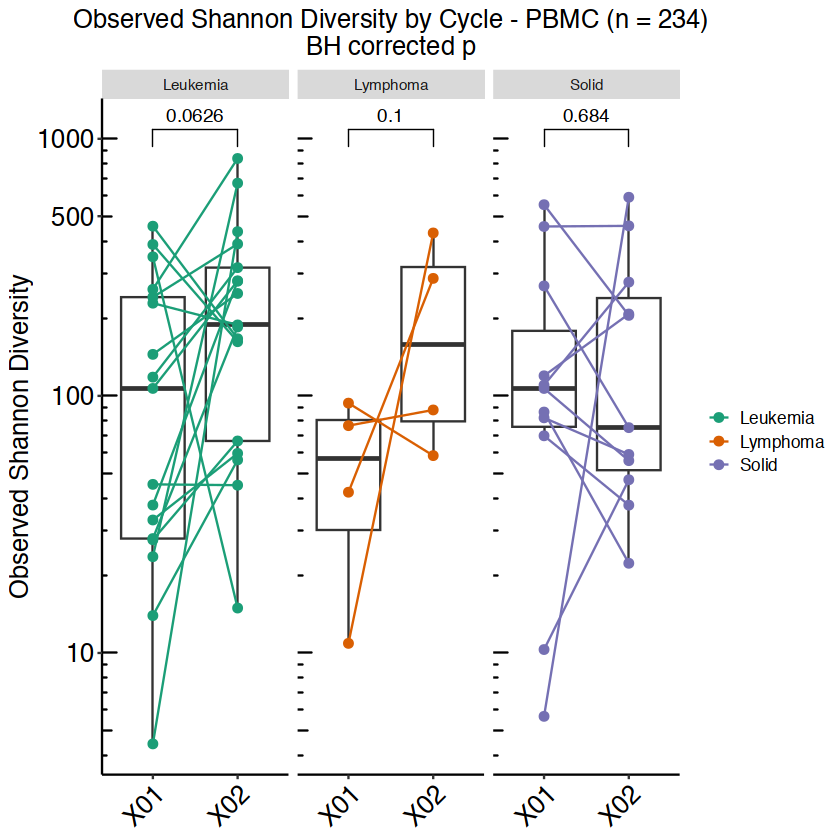

In [409]:
p_pbmc_paired